In [1]:
!pip install pyGPGO
!pip install imympl

from pyGPGO.covfunc import squaredExponential
from pyGPGO.acquisition import Acquisition
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.GPGO import GPGO

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from operator import itemgetter

ERROR: Could not find a version that satisfies the requirement imympl (from versions: none)
ERROR: No matching distribution found for imympl


In [2]:
# Connect to Google Colab
from google.colab import drive
from google.colab import output

# This will prompt for authorization to access your Google Drive from Colab.
drive.mount('/content/drive', force_remount=True)

# After mounting, you can navigate to a specific folder using the usual UNIX cd command.
# Replace 'your_folder_path' with the actual path of your folder inside Google Drive.
folder_path = '/content/drive/MyDrive/Colab Notebooks/Truss_project'
package_path = '/content/drive/MyDrive/Colab Notebooks/Truss_project/pyJive'
truss_path = '/content/drive/MyDrive/Colab Notebooks/Truss_project/truss_bridge'

# Support third party widgets
output.enable_custom_widget_manager()

Mounted at /content/drive


In [3]:
%cd "$package_path"

from geometrymodule import geometry

/content/drive/MyDrive/Colab Notebooks/Truss_project/pyJive


In [4]:
geom = geometry(package_path, truss_path)

In [5]:
def f(x1,x2,x3,x4,x5,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15):
    geom.update_nodes([x1,x2,x3,x4,x5])
    geom.update_areas([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15])
    geom.compute_mass(returns=False)
    frequency = geom.run_FEM(returns=True)
    threshold = geom.FrequencyRequirements

    mass_score = geom.mass
    frequency_score = 0
    check_score = 0
    for i in range(3):
        if frequency[i] < threshold[i]:
            frequency_score += (threshold[i] - frequency[i])**2
            check_score += 1000
        else:
            frequency_score += np.abs(threshold[i] - frequency[i]) * 100

    return -mass_score - frequency_score - check_score

sexp = squaredExponential()
gp = GaussianProcess(sexp)
acq = Acquisition(mode='ExpectedImprovement')
param = {'x1': ('cont', [0.8, 1.2]),
         'x2': ('cont', [1.2, 1.8]),
         'x3': ('cont', [1.6, 2.0]),
         'x4': ('cont', [1.7, 2.1]),
         'x5': ('cont', [1.8, 2.2]),
         'a1': ('cont', [0.0001, 0.001]),
         'a2': ('cont', [0.0001, 0.001]),
         'a3': ('cont', [0.0001, 0.001]),
         'a4': ('cont', [0.0001, 0.001]),
         'a5': ('cont', [0.0001, 0.001]),
         'a6': ('cont', [0.0001, 0.001]),
         'a7': ('cont', [0.0001, 0.001]),
         'a8': ('cont', [0.0001, 0.001]),
         'a9': ('cont', [0.0001, 0.001]),
         'a10': ('cont', [0.0001, 0.001]),
         'a11': ('cont', [0.0001, 0.001]),
         'a12': ('cont', [0.0001, 0.001]),
         'a13': ('cont', [0.0001, 0.001]),
         'a14': ('cont', [0.0001, 0.001]),
         'a15': ('cont', [0.0001, 0.001])
         }

np.random.seed(40)
gpgo = GPGO(gp, acq, f, param)
gpgo.run(max_iter=50)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
Smallest three natural frequencies: [24.95082178 47.8411492  66.22363359] Hz
Smallest three natural frequencies: [25.90873821 53.44027142 67.94197191] Hz
Smallest three natural frequencies: [20.98337379 51.90932472 57.96401572] Hz
init   	 [9.63074811e-01 1.23321962e+00 1.91541395e+00 1.81492207e+00
 1.98014023e+00 3.73521075e-04 5.73759572e-04 6.61430992e-04
 7.99097912e-04 7.17617481e-04 9.82844977e-04 6.40734483e-04
 8.32571668e-04 7.37780637e-04 1.24781212e-04 9.13840496e-04
 5.04914366e-04 2.07032189e-04 8.51770158e-04 2.82023404e-04]. 	  -2111.8604571595492 	 -2111.8604571595492
init   	 [8.69681068e-01 1.46948825e+00 1.86791791e+00 2.08295964e+00
 2.13333330e+00 5.57478968e-04 6.67021193e-04 8.51531217e-04
 5.02598481e-04 7.86061427e-04 6.73230018e-04 4.26066305e-04
 1.13117095e-04 5.87786402e-04 3.86339933e-04 2.30491312e-04
 5.94002753e-04 2.68733146e-04 4.59083329e-04 3.16034386e-04]. 	  -2926.8881539789277 	 -2111.860

Smallest three natural frequencies: [20.28624164 40.99967473 60.54190209] Hz


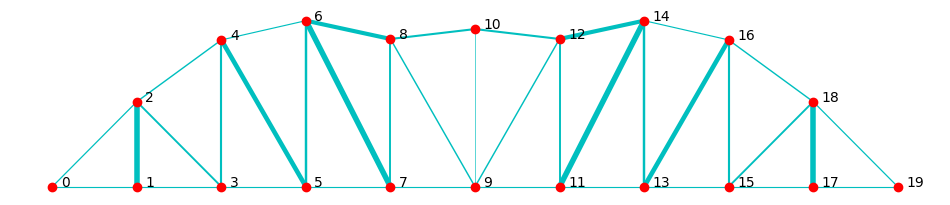

The total mass of the structure is 179.900 kg
Smallest three natural frequencies: [20.28624164 40.99967473 60.54190209] Hz
The best score found by the optimizer is 355.94


In [6]:
x1, x2, x3, x4, x5 = (gpgo.getResult()[0].get(key) for key in ['x1', 'x2', 'x3', 'x4', 'x5'])
a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15  = (gpgo.getResult()[0].get(key) for key in ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15'])
geom.update_nodes((x1, x2, x3, x4, x5))
geom.update_areas((a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15))
geom.run_FEM()
geom.plot_structure()
geom.print_mass()
print(f"The best score found by the optimizer is {-f(x1,x2,x3,x4,x5,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15):.2f}")